In [1]:
import numpy as np

# Load training data
X_train = np.load("train_gesture.npy")
y_train = np.load("train_gesture_labels.npy")

# Load validation data
X_val = np.load("validation_gesture.npy")
y_val = np.load("validation_gesture_labels.npy")

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")


X_train shape: (18465, 48, 48), y_train shape: (18465,)
X_val shape: (4600, 48, 48), y_val shape: (4600,)


In [2]:
from tensorflow.keras.utils import to_categorical

# Normalize the gesture images (if they are pixel data)
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0


# Assuming y_train and y_val are your label arrays
print("Unique classes in training data:", np.unique(y_train))
print("Number of unique classes in training data:", len(np.unique(y_train)))

print("Unique classes in validation data:", np.unique(y_val))
print("Number of unique classes in validation data:", len(np.unique(y_val)))

num_classes = len(np.unique(y_train)) 
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)

print(f"Number of classes: {num_classes}")

X_train = np.expand_dims(X_train,axis=-1)
X_val = np.expand_dims(X_val,axis = -1)


Unique classes in training data: [0 1 2 3]
Number of unique classes in training data: 4
Unique classes in validation data: [0 1 2 3]
Number of unique classes in validation data: 4
Number of classes: 4


In [3]:
print(X_train.shape)
print(y_val.shape)

(18465, 48, 48, 1)
(4600, 4)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Assuming gesture images are grayscale and have shape (height, width)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Single neuron with sigmoid activation
])


D:\Balance\College and Studies\TY\CV & DL Lab\Practice\test_venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=3,
                    batch_size=32)


Epoch 1/3
578/578 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.4227 - loss: 1.2822 - val_accuracy: 0.5452 - val_loss: 1.0858
Epoch 2/3
578/578 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.5437 - loss: 1.0577 - val_accuracy: 0.6048 - val_loss: 0.9472
Epoch 3/3
578/578 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.5893 - loss: 0.9687 - val_accuracy: 0.6174 - val_loss: 0.9209


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
True Label: 0, Predicted Class: 1


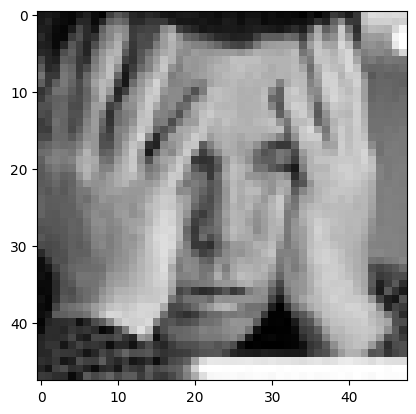

In [7]:
import matplotlib.pyplot as plt
# Example: Predicting a single gesture
test_index = 1 # Choose a sample index
test_gesture = X_val[test_index]
test_label = np.argmax(y_val[test_index])

# Expand dimensions to match input shape
test_gesture_expanded = np.expand_dims(test_gesture, axis=0)

# Predict the class
predicted_probabilities = model.predict(test_gesture_expanded)
predicted_class = np.argmax(predicted_probabilities)

print(f"True Label: {test_label}, Predicted Class: {predicted_class}")
plt.imshow(test_gesture.squeeze(),cmap='gray')


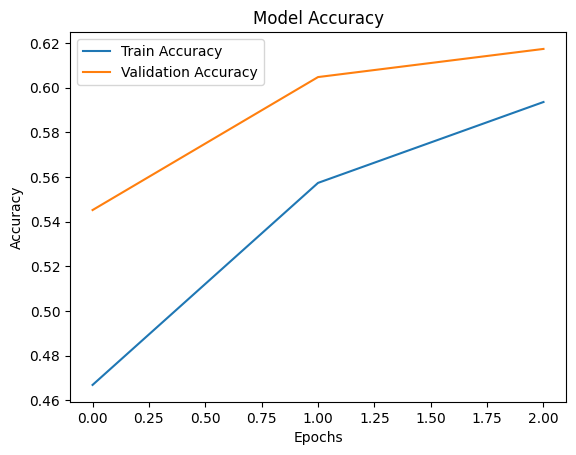

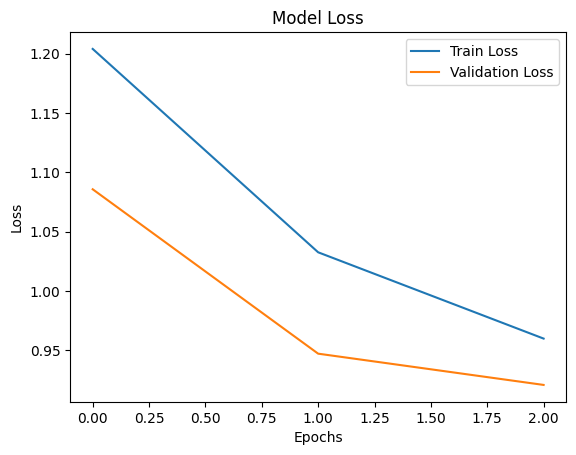

In [8]:


# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()
